In [2]:
import numpy as np 
import cv2 as cv
import matplotlib.pyplot as plt

In [29]:
image =cv.imread('outdoorMap.png')
image=cv.cvtColor(image,cv.COLOR_BGR2RGB)

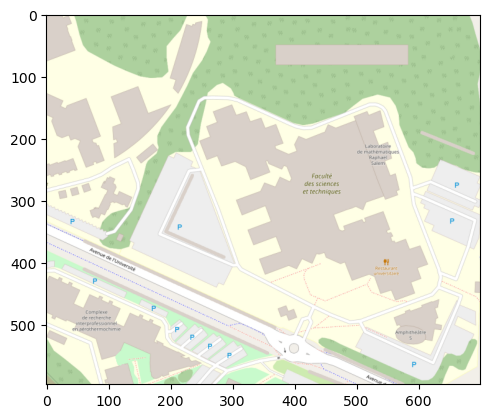

In [30]:
plt.imshow(image,cmap='gray')

In [31]:
mur=image[50,20]
mur

array([217, 208, 201], dtype=uint8)

In [ ]:
for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        if np.all(image[i,j]==[217, 208, 201]):
            image[i,j]=[0,0,0]
        else:
            image[i,j]=[255,255,255]

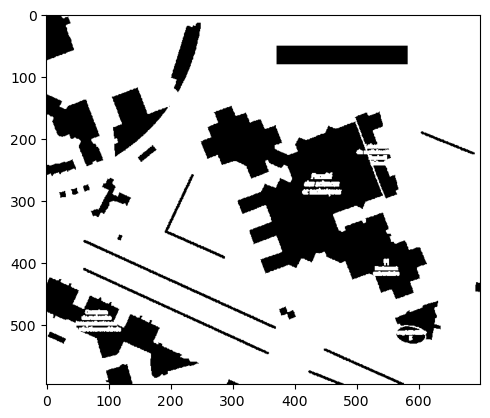

In [ ]:
plt.imshow(image)

In [35]:
im=image.copy()

In [36]:
#Inverser l'image
for i in range(0,im.shape[0]):
    for j in range(0,im.shape[1]):
        if (im[i,j]==[0,0,0]).all():
            im[i,j]=[255,255,255]
        else:
            im[i,j]=[0,0,0]

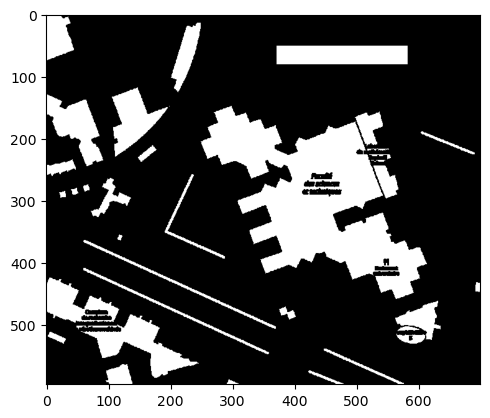

In [37]:
plt.imshow(im)

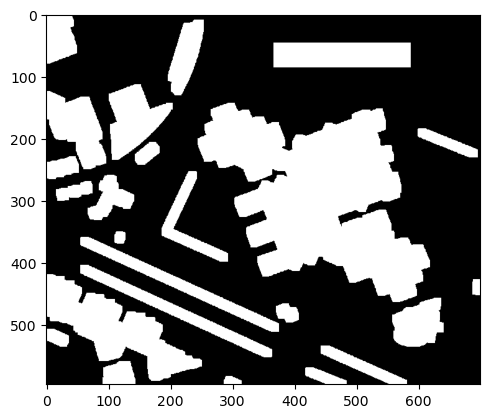

In [38]:
im_dilate=cv.dilate(im,kernel=np.ones((11,11)))
plt.imshow(im_dilate)

In [39]:
nouv_pix=cv.subtract(im_dilate,im)
nouv_pix=np.all(nouv_pix==[255,255,255],axis=-1)

In [40]:
image[nouv_pix]=[0,255,0]

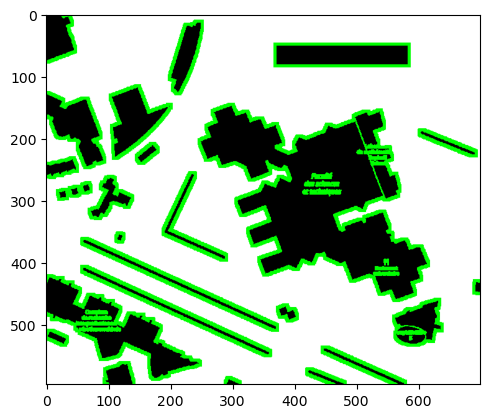

In [41]:
plt.imshow(image,cmap='gray')

# Une classe Point qui materialise les pixel

In [16]:
class Point:
    def __init__(self,coord):
        self.coord=coord
        self.h=0
        self.connex=[(self.coord[0],self.coord[1]+1),(self.coord[0],self.coord[1]-1),(self.coord[0]+1,self.coord[1]),(self.coord[0]-1,self.coord[1])]
        self.connex_8=[(self.coord[0],self.coord[1]+1),(self.coord[0],self.coord[1]-1),(self.coord[0]+1,self.coord[1]),(self.coord[0]-1,self.coord[1]),
                     (self.coord[0]-1,self.coord[1]-1),(self.coord[0]-1,self.coord[1]+1),(self.coord[0]+1,self.coord[1]+1),(self.coord[0]+1,self.coord[1]-1) ]
    def __eq__(self,other:object)->bool:
        return self.coord[0]==other.coord[0] and self.coord[1]==other.coord[1]
    def __hash__(self)->int:
        return self.coord[0]+self.coord[1]
    def distance(self,p):
            i=np.array(self.coord)
            j=np.array(p.coord)
            return np.sqrt(sum(i-j)**2)

# Algorithme graphe Trasversal

In [17]:
def graphe_Traversale(image,start:Point,end:Point):
    M=np.ones((image.shape[0],image.shape[1]))*1000000
    M[start.coord]=0
    l=[]
    l.append(start)
    while len(l)!=0 and l[0]!=end:
        p0=l[0]
        l.remove(p0)
        for p in p0.connex :
            pix=Point(p)
            if p[0]>-1 and p[1]>-1 and p[0]<image.shape[0] and p[1]<image.shape[1] :
                        if np.all(image[p[0],p[1]]==[255,255,255]):
                                if M[p0.coord]+1 < M[pix.coord]:
                                     M[pix.coord]=M[p0.coord]+1
                                     l.append(pix)
    if M[end.coord]==1000000:
        raise Exception('Pas de chemin possible')
    else:
        path=[]
        po=end
        while po!=start:
            pmin=Point(po.connex_8[0])
            for p in po.connex_8:
                if M[p]<M[pmin.coord]:
                    pmin=Point(p)
            po=pmin
            path.append(pmin)
    return path

# Algorithme A*

In [18]:
def Algorithme_A_Etoile(image,start:Point,end:Point):
    M=np.ones((image.shape[0],image.shape[1]))*1000000
    M[start.coord]=0
    l=[]
    l.append(start)
    while len(l)!=0 and l[0]!=end:
        p0=l[0]
        l.remove(p0)
        for p in p0.connex :
            pix=Point(p)
            if p[0]>-1 and p[1]>-1 and p[0]<image.shape[0] and p[1]<image.shape[1] :
                        if np.all(image[p[0],p[1]]==[255,255,255]):
                                if M[p0.coord]+1 < M[pix.coord]:
                                     M[pix.coord]=M[p0.coord]+1
                                     pix.h=M[pix.coord]+ pix.distance(end)
                                     l.append(pix)
        l.sort(key=lambda x: x.h)
    if M[end.coord]==1000000:
        raise Exception('Pas de chemin possible')
    else:
        path=[]
        po=end
        while po!=start:
            pmin=Point(po.connex_8[0])
            for p in po.connex_8:
                if M[p]<M[pmin.coord]:
                    pmin=Point(p)
            po=pmin
            path.append(pmin)
    return path

# Appliquer sur un plan extérieur  de l'UFR ST Madrillet en fausses couleurs

In [42]:
l=graphe_Traversale(image,Point((550,400)),Point((170,480)))

In [43]:
image_reel=cv.imread('outdoorMap.png')

In [44]:
for p in l:
    image_reel[p.coord]=[255,0,0]

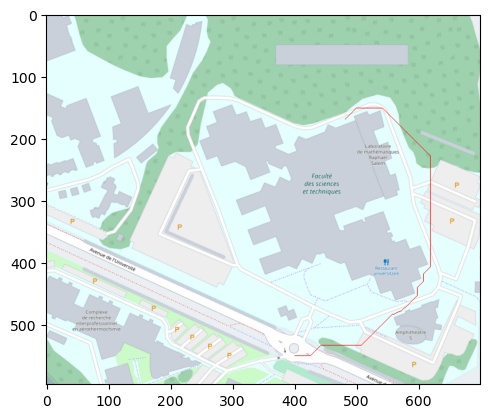

In [45]:
plt.imshow(image_reel)

# Appliquer sur un plan d'intérieur du bâtiment

In [46]:
l=graphe_Traversale(image,Point((350,300)),Point((170,480)))

In [23]:
im=cv.imread('outdoorMap.png')

In [47]:
for p in l:
    image_reel[p.coord]=[0,0,255]

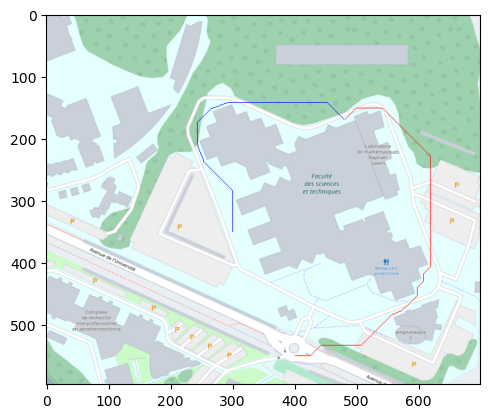

In [53]:
plt.scatter()
plt.imshow(image_reel)

In [368]:
l=graphe_Traversale(image,Point((350,300)),Point((170,480)))

In [374]:
import time
start_time = time.time()
## ligne de code pour réaliser la recherche de chemin a partir du rond point
graphe_Traversale(image,Point((550,400)),Point((170,480)))
print("--- %s seconds ---" % (time.time() - start_time))

--- 21.914119005203247 seconds ---


In [375]:
import time
start_time = time.time()
## ligne de code pour réaliser la recherche de cheminna partir de l'interieur
l=graphe_Traversale(image,Point((350,300)),Point((170,480)))
print("--- %s seconds ---" % (time.time() - start_time))

--- 16.61252784729004 seconds ---


# Le chemin en partant de l'interieur de l'universite est plus rapide 